<a href="https://colab.research.google.com/github/MatufA/simple-Kohonen-map/blob/master/SOM_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def draw(w1, w2, iterate, radius, l_rate):
  fig, ax = plt.subplots()
  plt.plot(w1, w2, color='blue', marker='o', linestyle='dashed', 
           linewidth=2, markersize=12)
  ax.set(xlabel='wieght 1', 
         ylabel='wieght 2',
         title='Kohonen algorithm (Iter: {}, Radius: {:.3f}, L_rate:{:.3f})'
         .format(iterate, radius, l_rate))
  ax.grid()
  plt.show()

In [0]:
def euclidean_dist(x, y, node):
  return np.square((x - x[node])**2 + (y - y[node])**2)

In [0]:
def bmu(x ,y, node):
  ed = euclidean_dist(x, y, node)
  argmin_x = np.argmin(ed[np.nonzero(ed)]).item()
  return argmin_x

In [0]:
def choose_randomly(x):
  return np.where(x == np.random.choice(x))


In [0]:
def update_neighbourhood(x, y, bmu_node, id_node, radius, alpha):
  ed = euclidean_dist(x, y, bmu_node)
  for idx, r in enumerate(ed):
    if r <= radius:
      x[idx] += alpha * radius * (x[idx] - x[id_node])
      y[idx] += alpha * radius * (y[idx] - y[id_node])
  return x, y

In [0]:
def train(x, y, max_iter, radius, alpha):
  init_alpha = alpha
  init_radius = radius
  for step in range(max_iter):
    choice_idx = choose_randomly(x)
    best_match = bmu(x, y, choice_idx)
    x, y = update_neighbourhood(x, y, best_match, choice_idx, radius, alpha)
    alpha = init_alpha * np.exp(-step/max_iter)
    radius  = init_radius * np.exp(-step/max_iter)
    if step == 100 or step == 500:
      draw(x, y, step, radius, alpha)
    if step == max_iter-1:
      draw(x, y, max_iter, radius, alpha)

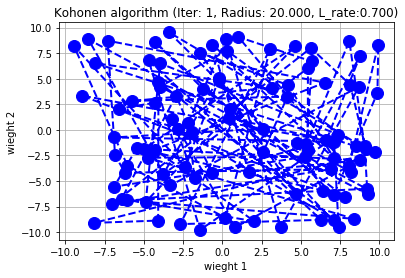

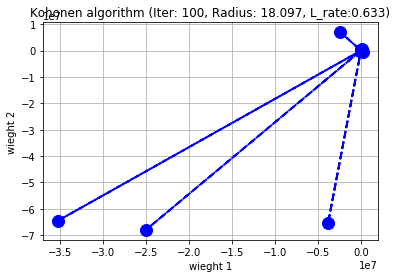

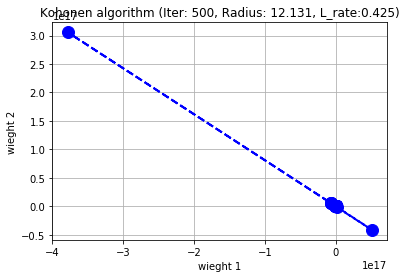

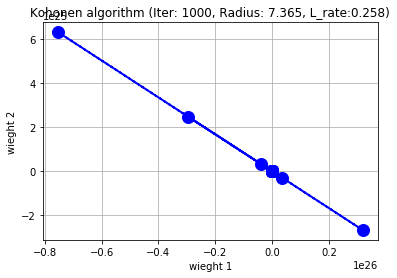

In [0]:
x = np.random.uniform(-10,10,100)
y = np.random.uniform(-10,10,100)
step_max = 1000
radius = 20
alpha = 0.7
draw(x, y, 1, radius, alpha)
train(x, y, step_max, radius, alpha)